In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [10]:
dataset = pd.read_csv("./data/iris.csv")
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
train, test = train_test_split(dataset, test_size = 0.4, stratify = dataset['species'], random_state = 42)

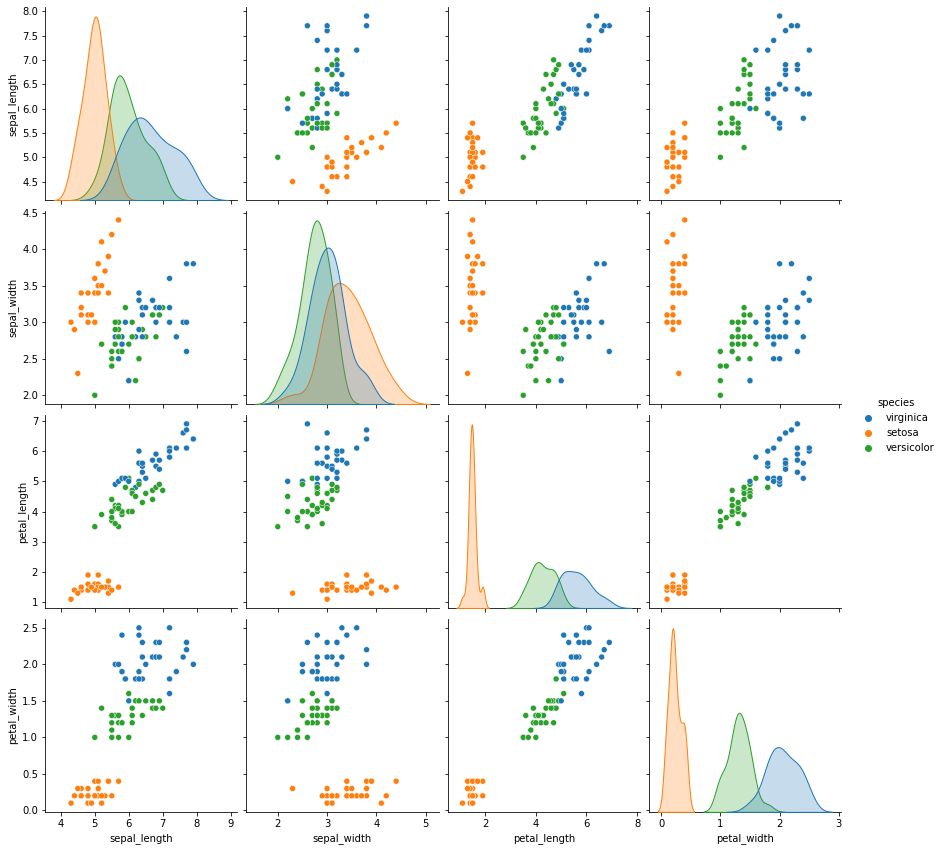

In [13]:
sns.pairplot(train, hue="species", height = 3);

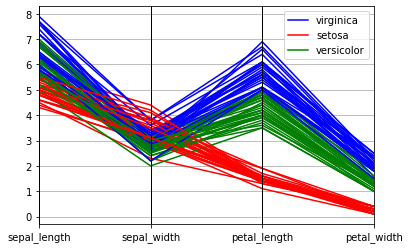

In [15]:
parallel_coordinates(train, "species", color = ['blue', 'red', 'green']);
# ukuran petal dapat membedakan spesies lebih baik dari sepal 

In [17]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [37]:
# discriminative classification model => classification trees
# https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052
# https://scikit-learn.org/stable/modules/tree.html
model = DecisionTreeClassifier(max_depth = 3, random_state = 1)
# Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data,
# and then increase the depth. #tips-on-practical-use
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('Hasil accuracy dari Decision Tree =>',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))
model.feature_importances_
# the first two features (sepal measurements) are of no importance, and only the petal ones
# are used to build this tree

Hasil accuracy dari Decision Tree => 0.983


array([0.        , 0.        , 0.42430866, 0.57569134])

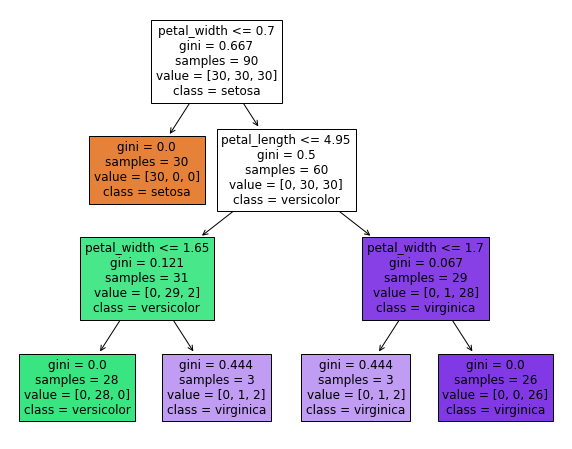

In [40]:
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (10,8))
plot_tree(model, feature_names = fn, class_names = cn, filled = True);
# gini explanation
# http://www.learnbymarketing.com/481/decision-tree-flavors-gini-info-gain/#:~:text=Summary%3A%20The%20Gini%20Index%20is,partitions%20with%20many%20distinct%20values.

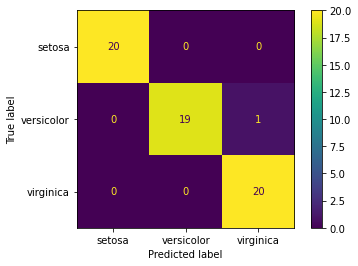

In [45]:
metrics.plot_confusion_matrix(model, X_test, y_test)